<a href="https://colab.research.google.com/github/01-slime/EDA/blob/main/LTV_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.float_format',lambda x:'%.2f'% x)

###Import Data

In [108]:
customer_value = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/customer_segmentation_result.csv')
customer_value.head()

,Unnamed: 0,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment
0,0,9100002488768.00,123,3,23,2,268088.00,2,7,High-Value
1,1,9100002508831.00,16,3,25,2,276824.00,2,7,High-Value
2,2,9100001761848.00,61,3,20,2,197248.00,2,7,High-Value
3,3,9100002184202.00,18,3,20,2,235864.00,2,7,High-Value
4,4,9100001249339.00,68,3,24,2,255800.00,2,7,High-Value


In [109]:
customer_value = customer_value.drop('Unnamed: 0',axis=1)
customer_value

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment
0,9100002488768.00,123,3,23,2,268088.00,2,7,High-Value
1,9100002508831.00,16,3,25,2,276824.00,2,7,High-Value
2,9100001761848.00,61,3,20,2,197248.00,2,7,High-Value
3,9100002184202.00,18,3,20,2,235864.00,2,7,High-Value
4,9100001249339.00,68,3,24,2,255800.00,2,7,High-Value
...,...,...,...,...,...,...,...,...,...
71200,9100002763261.00,329,1,1,0,5272.00,0,1,Low-Value
71201,9100001558486.00,113,3,38,3,45080.00,0,6,High-Value
71202,9100001384559.00,39,3,33,3,38816.00,0,6,High-Value
71203,9100001270685.00,33,3,31,3,67568.00,0,6,High-Value


###Label encoding

In [110]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
customer_value['Segment'] = labelencoder.fit_transform(customer_value["Segment"])
customer_value.head()

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment
0,9100002488768.00,123,3,23,2,268088.00,2,7,0
1,9100002508831.00,16,3,25,2,276824.00,2,7,0
2,9100001761848.00,61,3,20,2,197248.00,2,7,0
3,9100002184202.00,18,3,20,2,235864.00,2,7,0
4,9100001249339.00,68,3,24,2,255800.00,2,7,0


###Calculate Show correlations

In [111]:
corr_matrix = customer_value.corr()
corr_matrix

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment
CustomerID,1.00,0.13,-0.13,-0.29,-0.28,-0.30,-0.29,-0.26,0.16
Recency,0.13,1.00,-0.97,-0.47,-0.47,-0.44,-0.45,-0.77,0.15
RecencyCluster,-0.13,-0.97,1.00,0.47,0.47,0.43,0.44,0.78,-0.15
Frequency,-0.29,-0.47,0.47,1.00,0.97,0.93,0.91,0.89,-0.59
FrequencyCluster,-0.28,-0.47,0.47,0.97,1.00,0.90,0.90,0.90,-0.60
Revenue,-0.30,-0.44,0.43,0.93,0.90,1.00,0.95,0.87,-0.57
RevenueCluster,-0.29,-0.45,0.44,0.91,0.90,0.95,1.00,0.89,-0.59
OverallScore,-0.26,-0.77,0.78,0.89,0.90,0.87,0.89,1.00,-0.50
Segment,0.16,0.15,-0.15,-0.59,-0.60,-0.57,-0.59,-0.50,1.00


In [112]:
corr_matrix['Segment'].sort_values(ascending=False) #sort_values 比大小？
print(corr_matrix['Segment'].sort_values(ascending=False))

Segment             1.00
CustomerID          0.16
Recency             0.15
RecencyCluster     -0.15
OverallScore       -0.50
Revenue            -0.57
Frequency          -0.59
RevenueCluster     -0.59
FrequencyCluster   -0.60
Name: Segment, dtype: float64


###Standaration

In [113]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(customer_value[['Recency','Frequency','Revenue']])
y = customer_value['Segment']
#把資料存進x,而y是結果,我們要用x去預測y (y=ax+b)

In [114]:
x,y

(array([[-0.73342026,  1.44730373,  1.48475403],
        [-1.23016427,  1.64879703,  1.55725989],
        [-1.02125323,  1.14506377,  0.89680581],
        ...,
        [-1.12338752,  2.45477025, -0.41812661],
        [-1.15124232,  2.25327694, -0.17949467],
        [ 1.434612  ,  2.45477025, -0.45384837]]), 0        0
 1        0
 2        0
 3        0
 4        0
         ..
 71200    1
 71201    0
 71202    0
 71203    0
 71204    2
 Name: Segment, Length: 71205, dtype: int64)

###說明

In [115]:
#總結:做資料訓練之前，import資料，去看哪些是類別行or樹執行,去info裡看，把不要的刪除(透過pandas達成)，去掉留下來就是要訓練的資料
#那要把類別轉成數值，第一個就是labelencoding第二種事one hot encoding ,學姊用label
#看完之後轉乘了0/1/2，我們再去看他的相關係數
#有分證相關與父相關，越接近1就是月相近
#那整個資料探勘完之後，就把資料做標準化，用sklearn套件，把它分出x/y欄位是哪些，分出來後數值會介於1與-1之間
#要切成訓練資料或測試資料...

###Split Test and Trrain

In [116]:
from sklearn.model_selection import train_test_split
#split training and test sets
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.05, random_state=56)

In [117]:
X_train,y_train

(array([[-0.62200104, -0.66837597, -0.56645822],
        [-1.24873414,  1.24581042,  1.04068879],
        [-0.32488313, -0.76912262, -0.68325109],
        ...,
        [-1.10017518,  2.15253029,  3.29613917],
        [-0.5709339 ,  0.84282381,  1.16790604],
        [-0.73342026, -0.76912262, -0.61486186]]), 47816    1
 2621     0
 45725    1
 12237    0
 24839    0
         ..
 65769    1
 42106    1
 25835    0
 3264     0
 33167    2
 Name: Segment, Length: 67644, dtype: int64)

###Support Vector Machine

In [118]:
from sklearn import svm
from sklearn.model_selection import KFold, cross_val_score

clf = svm.SVC(kernel='rbf' ,C=1,gamma='auto') #高斯
clf.fit(X_train,y_train) #監督式學習-一定要給機器一個Y值，才能學習，kmeans則是非監督式學習 fit然後predict

clf.predict(X_test) #得出為y值

#參數
#1. 核函數 kernel - 在模型裡面，我們可以選擇各式各樣的核函數，包含線性、多項式、高斯、sigmoid等等
#2. 參數C - C為懲罰係數。 C愈大代表錯誤的容忍程度愈低，在訓練集樣本中會區分的愈精細，因此設定太大容易造成過度擬和的問題。反之，設定太小則會造成低度擬合的問題。若沒設定，模型中預設為1。
#3. 參數gamma - gamma參數決定支援向量的多寡，並影響訓練速度與預測速度 。此參數有兩個自動運算選擇，分別為’scale’與’auto’，或是也可以直接指定數值，設定後會以下列方式算出隱含參數，以決定資料映射到新特徵空間後的分佈，在未設定下預設為’scale’。


array([1, 1, 2, ..., 1, 1, 0])

In [119]:
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

#交叉驗證
scores = cross_val_score(clf,X_train,y_train,cv=5,scoring='accuracy')
print(scores)
print(scores.mean())

0.9667376263970197
0.9679865206402696
[0.9661468  0.96466849 0.96725553 0.96548156 0.96629213]
0.9659689007633206


###Logistic Regression

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print(logreg.score(X_train,y_train))
print(logreg.score(X_test,y_test))

0.936727573768553
0.939623701207526


###Naive Bayes

In [122]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.847436579740997
0.842740803145184


###K-Nearest Neighbors

In [123]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

y_pred = model.predict(X_test)
print(knn.score(X_train,y_train))
print(knn.score(X_test,y_test))

0.9974720596061735
0.9932603201347936


###Decision Tree

In [125]:
from sklearn.tree import DecisionTreeClassifier


model= DecisionTreeClassifier(max_depth=2,criterion='entropy')
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.8869227130270239
0.8938500421229991


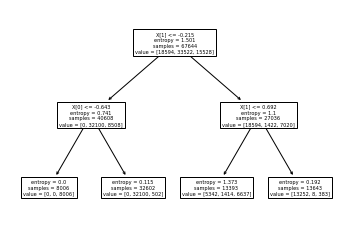

In [126]:
from sklearn.tree import export_graphviz
from sklearn import tree
# viz code
tree.plot_tree(model);

### xgboost

In [128]:
from xgboost import XGBClassifier

xgbc = XGBClassifier()
xgbc.fit(X_train,y_train)

print(xgbc.score(X_train,y_train))
print(xgbc.score(X_test,y_test))

0.9998965170599018
0.9997191800056164
